In [5]:
%config IPCompleter.greedy=True
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [6]:
import pandas as pd
import os 
import sys
import numpy as np
import matplotlib.pyplot as plt

In [7]:
proj_dir = os.path.dirname(os.getcwd())
print(proj_dir)

sys.path.append(proj_dir)

/home/waleed/projects/plot_animation


In [23]:
sys.executable

'/home/waleed/anaconda3/bin/python'

In [8]:
data = pd.read_csv(os.path.join(proj_dir, 'data', 'raw', '2021-05-01_Scotss-SL-data.csv'))

In [9]:
data.head()

,EVENT_TIME,SL_DEPTH,DSL_VAL,FLOW_VAL,G1_ELEVATION,USL_VAL,hu,hd,Cd,Q_MI,...,Vc,V,h,G1_ANGLE,Vg_hor,Cc,Vg_d,DDSL_VAL,HL,WS
0,2021-02-05 03:15:00,0.409,8.881340,129.574700,8.943,9.262330,0.319330,0.0,0.73,1.457943,...,0.192645,0.101837,-0.026035,35.276942,0.994462,0.703535,1.731470,9.273757,-0.032582,-0.000009
1,2021-02-06 01:00:00,0.385,8.849406,139.985300,8.965,9.300815,0.335815,0.0,0.73,1.572286,...,0.213150,0.104635,-0.033969,36.137329,1.008860,0.704115,1.774141,9.251174,-0.023233,-0.000006
2,2021-02-06 22:45:00,0.394,8.861156,145.365250,8.967,9.314533,0.347533,0.0,0.73,1.655294,...,0.222278,0.108054,-0.031219,36.216011,1.025280,0.704164,1.804703,9.259040,-0.027117,-0.000007
3,2021-02-07 11:15:00,0.392,8.861838,132.715700,9.024,9.343604,0.319604,0.0,0.73,1.459816,...,0.195921,0.093215,-0.028537,38.493323,0.953831,0.705309,1.727855,9.259974,-0.026863,-0.000007
4,2021-02-07 20:30:00,0.376,8.864019,90.364664,9.103,9.352092,0.249092,0.0,0.73,1.004430,...,0.134568,0.065806,-0.010357,41.775161,0.802348,0.706122,1.523634,9.267686,-0.021333,-0.000006


In [10]:
from src.plotting import plot_sample

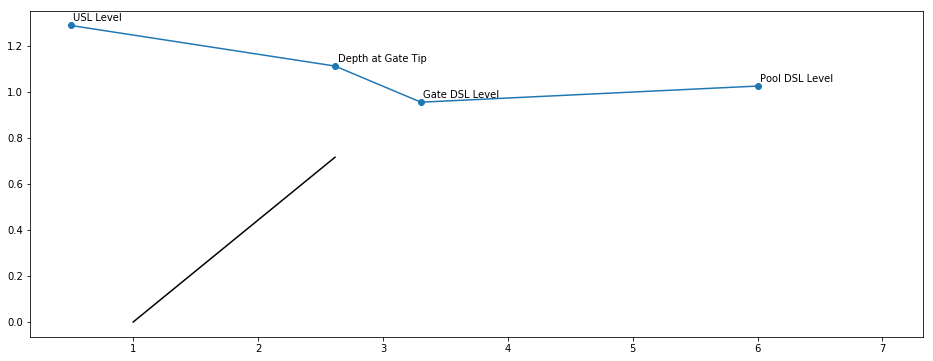

In [15]:
fig, ax = plt.subplots(figsize=(16,6))

sample = data.iloc[120]

plot_sample(ax, sample)

plt.show()

In [21]:
from celluloid import Camera
from time import sleep

In [25]:
fig, ax = plt.subplots(figsize=(16,6))
camera = Camera(fig)

for i in range(len(data)):
    plot_sample(ax, data.iloc[i])
    plt.legend([f'Q = {data.iloc[i].Q_MI:.2f} m3/s'])
    camera.snap()
#     sleep(1)
animation = camera.animate()
animation.save(os.path.join(proj_dir, 'reports', 'ws_elev.gif'), writer = 'imagemagick')
# animation.save(os.path.join(proj_dir, 'reports', 'ws_elev.mp4'))